# Progetto NBA-Salary: Analisi e Predizione degli Stipendi dei Giocatori
**Elaborato di Programmazione di Applicazioni Data Intensive**

**Autore:** [Alessio Bifulco]

## 1. Introduzione al Progetto

### 1.1. Contesto e Obiettivo
L'NBA (National Basketball Association) è una delle leghe sportive più ricche e seguite al mondo, con un giro d'affari multimiliardario in cui gli stipendi dei giocatori rappresentano una delle voci di costo più significative per le squadre. Comprendere quali fattori determinano il valore economico di un giocatore è una questione cruciale per la gestione di un team.

Questo progetto si pone tre obiettivi principali:
1.  **Analizzare l'evoluzione degli stipendi** nell'NBA nel decennio 2010-2020, con un focus specifico su come la distribuzione della ricchezza sia cambiata tra i diversi ruoli (playmaker, ali, centri).
2.  **Sviluppare un modello di machine learning** in grado di predire lo stipendio di un giocatore basandosi sulle sue statistiche di performance della stagione precedente.
3.  **Utilizzare il modello finale per una valutazione oggettiva**, confrontando lo stipendio predetto ("valore di mercato stimato") con lo stipendio reale di un giocatore, al fine di identificare atleti potenzialmente sottopagati o strapagati.

### 1.2. I Dataset
Per raggiungere i nostri obiettivi, utilizzeremo due dataset distinti:
- **Dataset Contratti (`contracts_df`):** Una raccolta di contratti firmati da giocatori NBA tra il 2010 e il 2020. La sua caratteristica fondamentale è che associa a ogni contratto le statistiche complete del giocatore nella stagione *precedente* alla firma. Questo lo rende ideale per il nostro obiettivo di predizione.


### 1.3. Librerie e Impostazioni Iniziali
Iniziamo importando le librerie Python fondamentali per la manipolazione dei dati, l'analisi numerica e la visualizzazione.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerie importate e impostazioni pronte.")

Librerie importate e impostazioni pronte.


---

## 2. Caricamento e Ispezione Iniziale dei Dati

Il primo passo operativo è caricare i nostri dataset e condurre un'ispezione preliminare per comprenderne la struttura, i tipi di dato e la presenza di eventuali problemi come valori mancanti.

### 2.1. Caricamento dei Dati Locali

I dataset sono stati scaricati e organizzati in una struttura di cartelle locale. Ora li carichiamo in pandas specificando i percorsi relativi alla posizione del nostro notebook.

In [2]:
import os
import pandas as pd


path_base = '../dataset/'

contratti_folder_name = 'salaryDataset'


nome_file_contratti = 'nba_contracts_history.csv'


percorso_completo_contratti = os.path.join(path_base, contratti_folder_name, nome_file_contratti)


try:
    contracts_df = pd.read_csv(percorso_completo_contratti)
    
    print("✅ Dataset caricati con successo dai percorsi locali!")
    
except FileNotFoundError as e:
    print(f"❌ ERRORE: File non trovato.")
    print(f"Dettaglio errore: {e}")
    print("\nControlla che il nome del file delle statistiche ('Seasons_Stats.csv') sia corretto.")

if 'contracts_df' in locals():
    print("\nPrime 10 righe del DataFrame dei Contratti:")
    display(contracts_df.head(10))


✅ Dataset caricati con successo dai percorsi locali!

Prime 10 righe del DataFrame dei Contratti:


,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0
5,Austin Rivers,2015,2016,7055398.0,22.0,76.0,46.0,30.0,1563.0,530.0,...,67.5,27.0,125.0,152.0,155.0,65.0,48.0,14.0,146.0,-128.0
6,Wayne Ellington,2016,2017,6135000.0,28.0,76.0,18.0,58.0,1615.0,586.0,...,85.7,20.0,154.0,174.0,83.0,45.0,48.0,5.0,82.0,-322.0
7,JaMychal Green,2019,2020,4767000.0,29.0,65.0,31.0,34.0,1371.0,611.0,...,79.2,104.0,305.0,409.0,50.0,87.0,45.0,34.0,193.0,-214.0
8,Kyle O'Quinn,2015,2018,4051312.5,25.0,51.0,15.0,36.0,824.0,294.0,...,77.2,46.0,153.0,199.0,59.0,55.0,31.0,39.0,110.0,-123.0
9,Trevor Ariza,2014,2017,8000000.0,28.0,77.0,41.0,36.0,2723.0,1107.0,...,77.2,99.0,376.0,475.0,191.0,132.0,126.0,20.0,179.0,196.0


---
## 3. Data Cleaning e Feature Engineering

Questa è una fase cruciale in cui non solo "puliamo" i dati, ma li trasformiamo e li arricchiamo per renderli più significativi per la nostra analisi e per il modello di machine learning.

Seguiremo questi passaggi:
1.  **Pulizia di Base:** Ridenominazione delle colonne e conversione dei tipi di dato (es. stipendio).
2.  **Creazione delle Statistiche "Per Partita":** Normalizzeremo le statistiche totali sul numero di partite giocate.
3.  **Ingegneria delle Feature del Contratto:** Creeremo le colonne `durata_contratto` e `valore_totale_contratto` a partire dai dati esistenti.
4.  **Gestione Finale dei Valori Mancanti.**

### 3.1. Pulizia di Base: Nomi Colonne e Formato Stipendio
Come primo passo, eseguiamo la pulizia standard: convertiamo i nomi delle colonne in formato `snake_case` e trasformiamo la colonna dello stipendio in un valore numerico, rimuovendo caratteri come `$` e `,`.

In [3]:
if 'avg_salary' not in contracts_df.columns:
    print("Eseguo la pulizia di base (ridenominazione colonne)...")
    
    contracts_df.columns = [col.lower().replace(' ', '_').replace('.', '').replace('%', '_prc') for col in contracts_df.columns]
    
        
    print("✅ Colonne rinominate con successo.")
    print("\nNuovi nomi:", list(contracts_df.columns))

else:
    print("✅ Pulizia di base già eseguita. Colonne già rinominate.")

Eseguo la pulizia di base (ridenominazione colonne)...
✅ Colonne rinominate con successo.

Nuovi nomi: ['name', 'contract_start', 'contract_end', 'avg_salary', 'age', 'gp', 'w', 'l', 'min', 'pts', 'fgm', 'fga', 'fg_prc', '3pm', '3pa', '3p_prc', 'ftm', 'fta', 'ft_prc', 'oreb', 'dreb', 'reb', 'ast', 'tov', 'stl', 'blk', 'pf', '+/-']


### 3.2. Feature Engineering: Creazione delle Statistiche "Per Partita"

Le statistiche totali (es. `pts` - punti totali in una stagione) sono fortemente influenzate da quante partite un giocatore ha disputato. Un giocatore che segna 1000 punti in 82 partite è diverso da uno che ne segna 1000 in 50 a causa di un infortunio.

Per rendere le statistiche direttamente confrontabili tra i giocatori, le normalizzeremo dividendole per il numero di partite giocate (la colonna `g`). Creeremo nuove colonne con il suffisso `_per_g` (per game) e rimuoveremo quelle originali per evitare ridondanza.

In [4]:

if 'contract_duration_years' not in contracts_df.columns:
    print("Eseguo il feature engineering...")

    nome_colonna_partite = 'gp'
    stats_to_overwrite = [
        'min', 'pts', 'fgm', 'fga', '3pm', '3pa', 'ftm', 'fta',
        'oreb', 'dreb', 'reb', 'ast', 'tov', 'stl', 'blk', 'pf', '+/-'
    ]
    
    def round_up_to_05(n):
        return np.ceil(n * 20) / 20

    for stat in stats_to_overwrite:
        if stat in contracts_df.columns:
            per_game_values = contracts_df[stat] / contracts_df[nome_colonna_partite]
            contracts_df[stat] = per_game_values.apply(round_up_to_05)

    contracts_df['contract_duration_years'] = contracts_df['contract_end'] - contracts_df['contract_start']
    contracts_df['total_contract_value'] = contracts_df['avg_salary'] * contracts_df['contract_duration_years']
    contracts_df = contracts_df.drop(columns=['contract_start', 'contract_end'])

    contracts_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    contracts_df.fillna(0, inplace=True)

    print("\n✅ Feature engineering completato!")
else:
    print("✅ Feature engineering già eseguito. Nessuna operazione effettuata.")

Eseguo il feature engineering...

✅ Feature engineering completato!


In [5]:
display(contracts_df.head(5))


,name,avg_salary,age,gp,w,l,min,pts,fgm,fga,...,dreb,reb,ast,tov,stl,blk,pf,+/-,contract_duration_years,total_contract_value
0,Wesley Matthews,2564753.0,32.0,69.0,27.0,42.0,30.35,12.20,4.05,10.15,...,2.00,2.50,2.35,1.35,0.80,0.25,2.35,-1.30,1,2564753.0
1,Brook Lopez,21165675.0,27.0,72.0,34.0,38.0,29.20,17.20,7.05,13.75,...,4.50,7.45,0.70,1.45,0.60,1.75,2.90,-1.40,2,42331350.0
2,DeAndre Jordan,10759763.5,22.0,80.0,31.0,49.0,25.60,7.10,2.95,4.30,...,4.60,7.20,0.55,1.30,0.55,1.80,3.20,-1.25,3,32279290.5
3,Markieff Morris,8143323.5,25.0,82.0,39.0,43.0,31.50,15.35,6.25,13.45,...,4.85,6.20,2.35,2.10,1.25,0.50,3.00,1.30,3,24429970.5
4,Dwight Howard,13410739.0,32.0,81.0,35.0,46.0,30.45,16.65,6.25,11.25,...,9.35,12.50,1.30,2.60,0.60,1.65,3.10,1.10,1,13410739.0


---
## 4. Analisi Esplorativa dei Dati (EDA)

Ora che i dati sono puliti e arricchiti, iniziamo a esplorarli per scoprire insight e relazioni. Questa fase è fondamentale per capire le dinamiche del dataset prima di passare alla modellazione.

Ci concentreremo su:
- **Analisi delle Correlazioni:** Per capire quali variabili sono più legate tra loro, in particolare allo stipendio.
- **Analisi per Ruolo:** Per visualizzare le differenze di performance e guadagno tra le posizioni in campo.

### 4.1. Matrice di Correlazione

La matrice di correlazione è uno strumento potentissimo per avere una visione d'insieme delle relazioni lineari tra tutte le variabili numeriche del dataset. I valori vanno da -1 (correlazione negativa perfetta) a +1 (correlazione positiva perfetta), con 0 che indica assenza di correlazione lineare.

Creeremo una "heatmap" (mappa di calore) per visualizzare la matrice. Siamo particolarmente interessati alla riga/colonna relativa a `avg_salary`.

Le feature che verranno visualizzate nella heatmap sono:
['pts', 'fgm', 'fta', 'ftm', 'fga', 'min', 'dreb', 'tov', 'reb', '+/-']


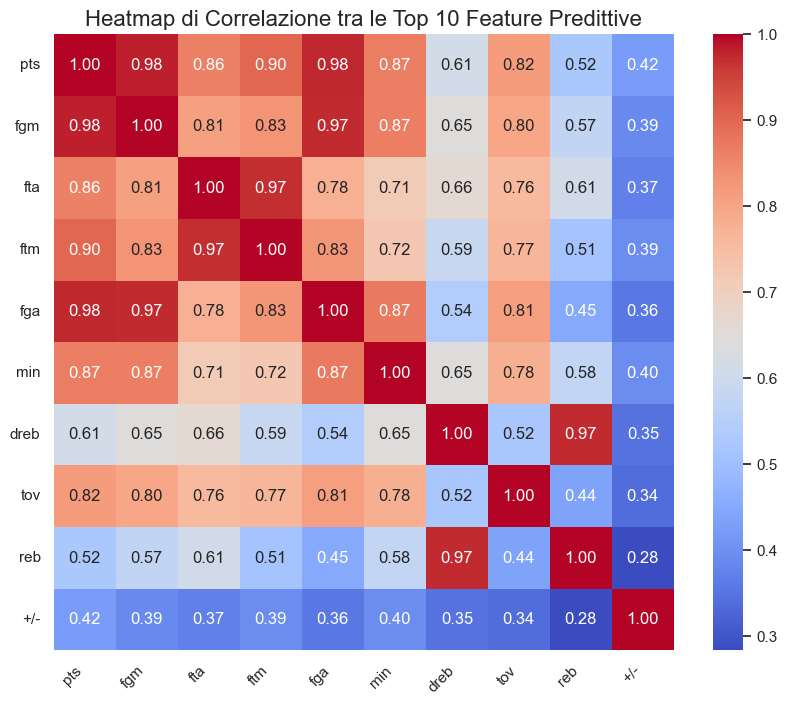

In [5]:
numeric_df = contracts_df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

salary_correlations = correlation_matrix['avg_salary'].sort_values(ascending=False)

n_features = 12
top_features_with_target = salary_correlations.nlargest(n_features).index

features_for_heatmap = top_features_with_target.drop(['avg_salary', 'total_contract_value'])

print(f"Le feature che verranno visualizzate nella heatmap sono:\n{list(features_for_heatmap)}")

final_corr_matrix = contracts_df[features_for_heatmap].corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(
    final_corr_matrix,
    annot=True,      
    cmap='coolwarm',
    fmt=".2f"        
)
plt.title(f'Heatmap di Correlazione tra le Top {len(features_for_heatmap)} Feature Predittive', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Interpretazione della Heatmap di Correlazione (Sintesi)

L'analisi della mappa di calore (heatmap) ci fornisce tre indicazioni chiave:

1.  **Conferma delle Relazioni Logiche:** Evidenzia forti correlazioni positive tra statistiche che misurano aspetti simili del gioco, come quelle relative ai tiri (punti, tiri tentati) o ai rimbalzi.

2.  **Presenza di Multicollinearità:** Il punto tecnico più importante è la chiara presenza di **multicollinearità**. Molte feature sono "ridondanti" tra loro, un fattore cruciale da considerare nella successiva fase di modellazione.

3.  **Necessità di Focus:** La mappa completa, per via delle sue dimensioni, non è ideale per analizzare nel dettaglio le singole correlazioni con lo stipendio, rendendo necessari i grafici più focalizzati che abbiamo creato successivamente.

C:\Users\aless\AppData\Local\Temp\ipykernel_8520\4252468982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cleaned_salary_correlations.values, y=cleaned_salary_correlations.index, palette='viridis')


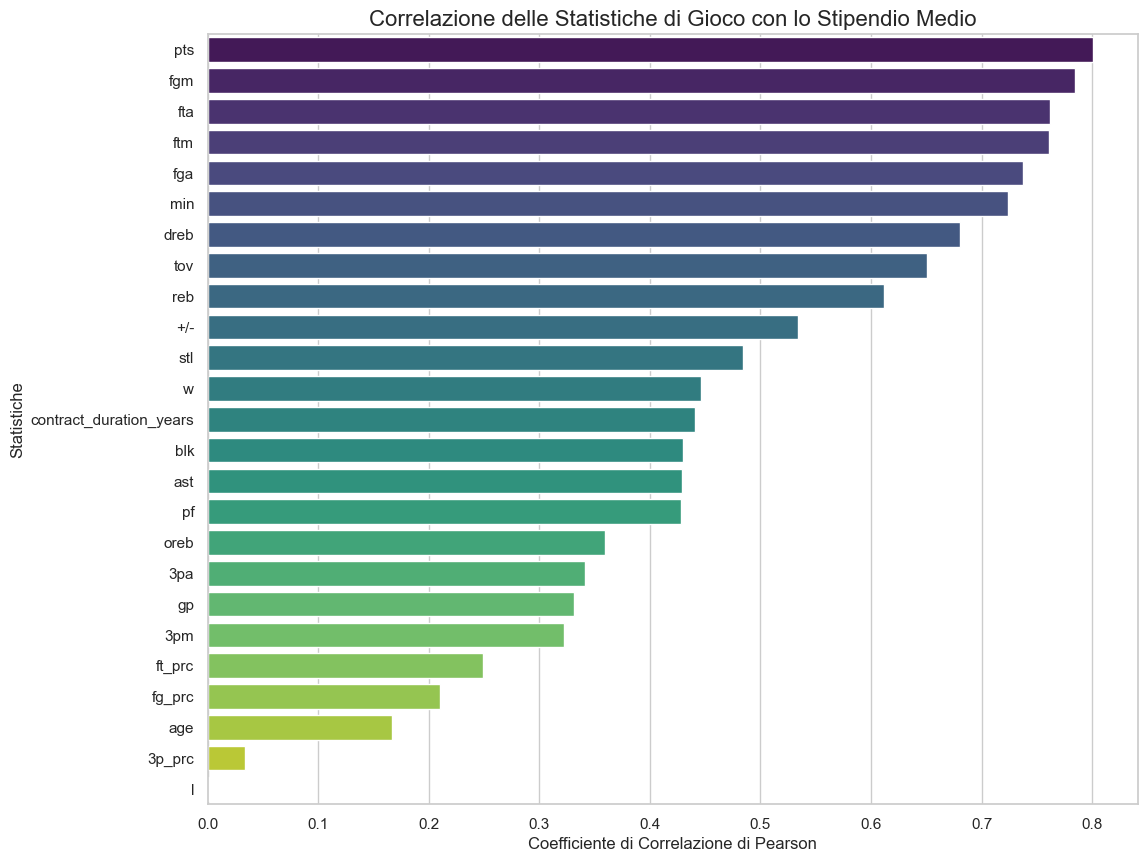


✅ Grafico generato con successo.


In [6]:

numeric_df = contracts_df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

salary_correlations = correlation_matrix['avg_salary'].sort_values(ascending=False)

vars_to_drop = ['avg_salary', 'total_contract_value']
cleaned_salary_correlations = salary_correlations.drop(labels=vars_to_drop, errors='ignore')

# 5. Ora, nella stessa cella, creiamo il grafico a barre
plt.figure(figsize=(12, 10))
sns.barplot(x=cleaned_salary_correlations.values, y=cleaned_salary_correlations.index, palette='viridis')

plt.title('Correlazione delle Statistiche di Gioco con lo Stipendio Medio', fontsize=16)
plt.xlabel('Coefficiente di Correlazione di Pearson', fontsize=12)
plt.ylabel('Statistiche', fontsize=12)
plt.show()

print("\n✅ Grafico generato con successo.")

### Interpretazione del Grafico a Barre (Sintesi)

Il grafico a barre, che ordina le statistiche per la loro correlazione con lo stipendio, ci fornisce una chiara gerarchia di quali fattori sono più importanti.

- **Fattori Dominanti:** I **punti (`pts`) e i minuti giocati (`min`)** sono, senza sorpresa, i predittori più forti. Il mercato premia principalmente chi segna e chi è considerato abbastanza importante da rimanere in campo a lungo.

- **Volume > Efficienza:** Un insight chiave è che il **volume di gioco** (es. tiri tentati `fga`, `fta`) ha una correlazione più alta con lo stipendio rispetto alla pura **efficienza** (es. `fg_prc`). Essere il fulcro dell'attacco è economicamente più rilevante della precisione al tiro.

- **Fattori Secondari:** Statistiche importanti come **rimbalzi (`reb`) e assist (`ast`)** mostrano una correlazione positiva ma nettamente inferiore, confermando il loro ruolo di "specializzazione" secondaria rispetto alla capacità di segnare.

- **Irrilevanza dell'Età:** L'**età (`age`)** ha una correlazione quasi nulla, a riprova del fatto che i contratti sono legati alla performance attuale e attesa, non all'anzianità del giocatore.

In conclusione, questa analisi ci indica chiaramente che un modello efficace dovrà basarsi pesantemente sulla produzione offensiva (punti e volume di tiri) e sul ruolo del giocatore all'interno della squadra (minuti giocati).

### 4.2. Distribuzione delle Feature più Rilevanti

Dopo aver visto *quali* feature sono più correlate allo stipendio, è utile analizzare *come* sono distribuite. Osserviamo la distribuzione di due delle variabili più significative emerse dall'analisi di correlazione: i punti per partita (`pts`) e l'età del giocatore (`age`).

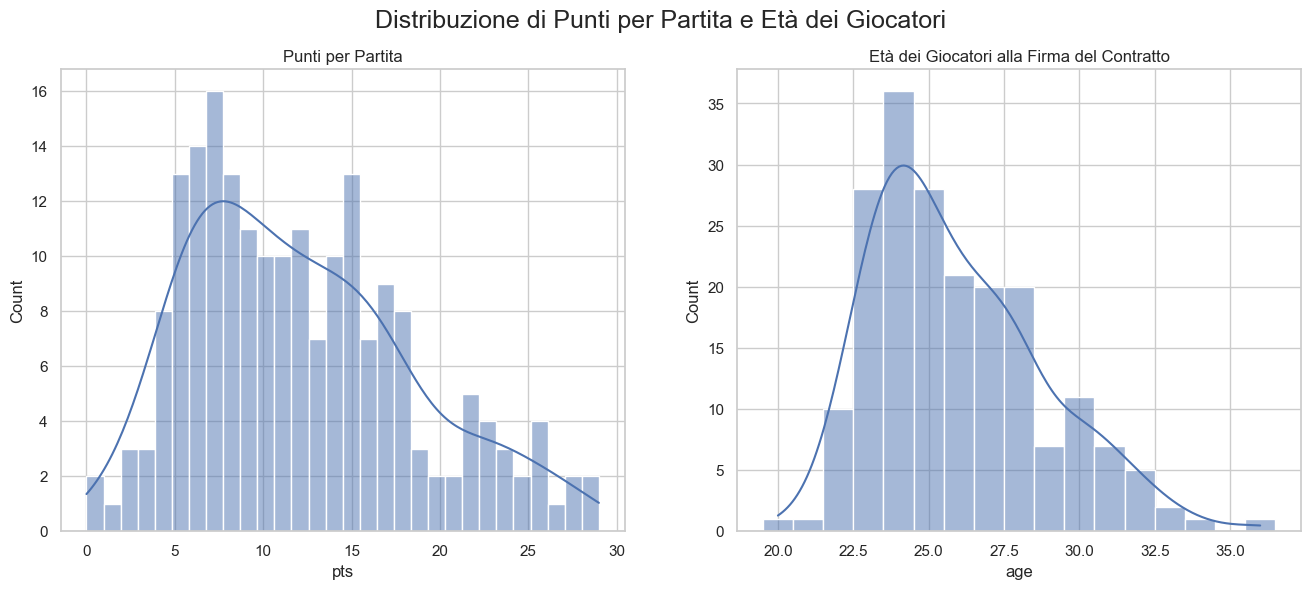

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribuzione di Punti per Partita e Età dei Giocatori', fontsize=18)

sns.histplot(data=contracts_df, x='pts', ax=axes[0], kde=True, bins=30)
axes[0].set_title('Punti per Partita')

sns.histplot(data=contracts_df, x='age', ax=axes[1], kde=True, bins=20, discrete=True)
axes[1].set_title('Età dei Giocatori alla Firma del Contratto')

plt.show()

### Interpretazione delle Distribuzioni Chiave

Questi due istogrammi ci danno un'idea precisa delle caratteristiche del nostro campione di giocatori:

-   **Grafico dei Punti per Partita (`pts`):** La distribuzione è fortemente **asimmetrica a destra**. Questo è un pattern classico nel mondo dello sport: la maggior parte dei giocatori si attesta su un contributo offensivo "medio" (tra 5 e 15 punti), mentre un'élite di poche superstar segna un numero di punti molto più elevato, creando una "coda" lunga verso i valori alti del grafico.

-   **Grafico dell'Età (`age`):** Questo grafico è molto informativo. Ci mostra che la stragrande maggioranza dei contratti analizzati viene firmata da giocatori nel loro "prime atletico", con un picco chiarissimo **tra i 26 e i 29 anni**. Si nota come siano rari i contratti importanti per giocatori molto giovani (sotto i 23-24 anni) e per i veterani (sopra i 34-35 anni), confermando che il mercato paga soprattutto per gli anni di massima performance.

### 4.3. Analisi per Ruolo (Posizione in Campo)

Ora analizziamo come stipendi e performance cambiano in base al ruolo del giocatore. Per prima cosa, visualizziamo la distribuzione generale degli stipendi per ogni posizione con un boxplot.

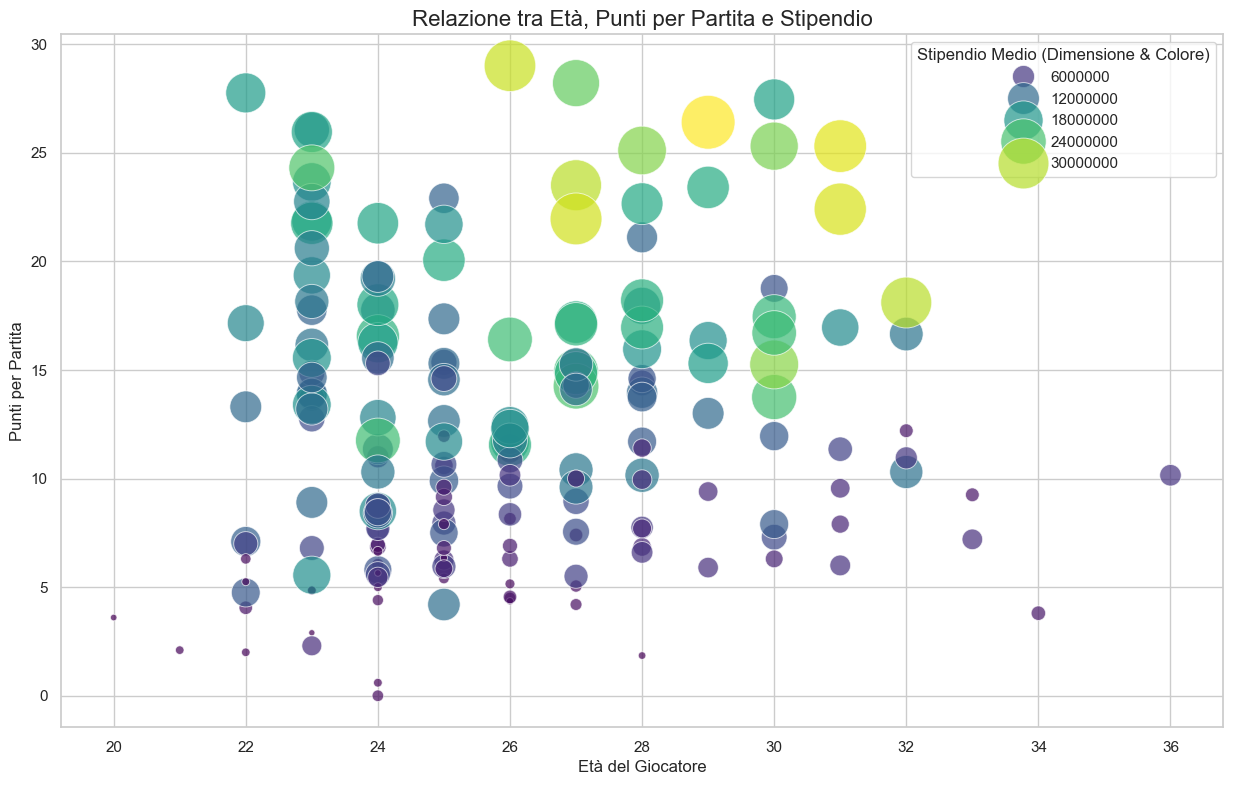

In [8]:
plt.figure(figsize=(15, 9))
sns.scatterplot(
    data=contracts_df,
    x='age',
    y='pts',
    size='avg_salary',  
    hue='avg_salary',   
    palette='viridis',
    sizes=(20, 1500),  
    alpha=0.7           
)
plt.title('Relazione tra Età, Punti per Partita e Stipendio', fontsize=16)
plt.xlabel('Età del Giocatore', fontsize=12)
plt.ylabel('Punti per Partita', fontsize=12)
plt.legend(title='Stipendio Medio (Dimensione & Colore)')
plt.show()

### Interpretazione della Relazione tra Età, Performance e Stipendio

Questo grafico è la sintesi perfetta della nostra analisi. Mettendo insieme le tre variabili più importanti (età, punti e stipendio), ci permette di visualizzare il profilo del giocatore più pagato:

-   **La "Zona d'Oro":** Si vede chiaramente un ammasso di **punti grandi e di colore giallo/verde chiaro** (gli stipendi più alti) nell'area che va dai **26 ai 31 anni** di età e per giocatori che segnano **dai 20 punti in su**. Questa è la "zona d'oro" di un giocatore NBA, dove la massima performance atletica si traduce nei contratti più ricchi.

-   **Valore della Performance:** Il grafico mostra che, a parità di età, i giocatori con una media punti più alta (più in alto sull'asse Y) hanno quasi sempre punti più grandi e di colore più "caldo", a conferma che la performance offensiva è il driver principale del valore economico. I giocatori con medie punti basse, indipendentemente dall'età, si concentrano nella parte bassa del grafico con stipendi inferiori.

---
## 5. Preparazione dei Dati per la Modellazione

Dopo aver esplorato i dati, è il momento di prepararli per l'addestramento dei nostri modelli di machine learning. Questa fase prevede la definizione del nostro problema in termini di feature e target e la suddivisione del dataset per una corretta validazione.

### 5.1. Definizione di Feature (X) e Target (y)

Il nostro obiettivo è predire lo stipendio medio (`avg_salary`). Questa sarà la nostra variabile **target (y)**.

Tutte le altre colonne informative (statistiche per partita, età, durata del contratto, etc.) saranno le nostre **feature (X)**. È fondamentale escludere dalle feature le colonne non predittive (come `name`) e quelle che causerebbero data leakage (come `total_contract_value`, che è calcolato a partire dal target stesso).

In [9]:
y = contracts_df['avg_salary']

features_to_drop = ['avg_salary', 'total_contract_value', 'name']
X = contracts_df.drop(columns=features_to_drop)

print("--- Variabile Target (y) ---")
print(f"Numero di campioni: {y.shape[0]}")
display(y.head())

print("\n--- Features (X) ---")
print(f"Numero di campioni: {X.shape[0]}, Numero di features: {X.shape[1]}")
display(X.head())

--- Variabile Target (y) ---
Numero di campioni: 199


0     2564753.0
1    21165675.0
2    10759763.5
3     8143323.5
4    13410739.0
Name: avg_salary, dtype: float64


--- Features (X) ---
Numero di campioni: 199, Numero di features: 25


,age,gp,w,l,min,pts,fgm,fga,fg_prc,3pm,...,oreb,dreb,reb,ast,tov,stl,blk,pf,+/-,contract_duration_years
0,32.0,69.0,27.0,42.0,30.35,12.20,4.05,10.15,40.0,2.20,...,0.50,2.00,2.50,2.35,1.35,0.80,0.25,2.35,-1.30,1
1,27.0,72.0,34.0,38.0,29.20,17.20,7.05,13.75,51.3,0.05,...,3.00,4.50,7.45,0.70,1.45,0.60,1.75,2.90,-1.40,2
2,22.0,80.0,31.0,49.0,25.60,7.10,2.95,4.30,68.6,0.00,...,2.60,4.60,7.20,0.55,1.30,0.55,1.80,3.20,-1.25,3
3,25.0,82.0,39.0,43.0,31.50,15.35,6.25,13.45,46.5,0.70,...,1.35,4.85,6.20,2.35,2.10,1.25,0.50,3.00,1.30,3
4,32.0,81.0,35.0,46.0,30.45,16.65,6.25,11.25,55.5,0.05,...,3.15,9.35,12.50,1.30,2.60,0.60,1.65,3.10,1.10,1


### 5.3. Suddivisione in Training Set e Test Set

Questo è l'ultimo passaggio della preparazione. Suddividiamo il nostro dataset (`X` e `y`) in due set distinti:
-   **Training Set** (80% dei dati) che useremo per "insegnare" al modello.
-   **Test Set** (20% dei dati) che terremo da parte per una valutazione finale e imparziale delle performance del modello.

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Suddivisione dei dati completata con successo.")
print(f"Dimensioni del Training Set (X_train): {X_train.shape}")
print(f"Dimensioni del Test Set (X_test):   {X_test.shape}")

Suddivisione dei dati completata con successo.
Dimensioni del Training Set (X_train): (159, 25)
Dimensioni del Test Set (X_test):   (40, 25)


---
## 6. Addestramento e Valutazione dei Modelli

Questa è la fase centrale del progetto. Utilizzeremo i dati di training (`X_train`, `y_train`) per addestrare due diversi modelli di regressione, come richiesto dalle linee guida. Successivamente, valuteremo le loro performance sul test set (`X_test`, `y_test`) per capire quale dei due è più efficace nel predire gli stipendi.

### Metriche di Valutazione
Per un problema di regressione come il nostro, useremo tre metriche principali:
-   **Mean Absolute Error (MAE):** L'errore medio assoluto. Ci dice, in media, di quanti dollari il nostro modello sbaglia la previsione. Un valore più basso è migliore.
-   **Mean Squared Error (MSE):** L'errore quadratico medio. Simile al MAE, ma penalizza di più gli errori grandi. Anche qui, un valore più basso è migliore.
-   **Coefficiente R² (R-squared):** Indica la percentuale di varianza della variabile target (lo stipendio) che il modello è in grado di spiegare. Varia da 0 a 1 (o 0% a 100%). Un valore più alto è migliore.

### 6.1. Modello 1: Regressione Lineare (Baseline)

Iniziamo con il modello più semplice e fondamentale per la regressione: la Regressione Lineare. Questo modello cerca di trovare la migliore relazione lineare (una "retta" in più dimensioni) tra le nostre feature e lo stipendio. Sarà la nostra "baseline", ovvero il punto di partenza con cui confronteremo modelli più complessi.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Performance Regressione Lineare ---")
print(f"Mean Absolute Error (MAE): ${mae_lr:,.0f}")
print(f"Mean Squared Error (MSE): {mse_lr:,.0f}")
print(f"Coefficiente R²: {r2_lr:.2f} ({r2_lr:.2%})")

--- Performance Regressione Lineare ---
Mean Absolute Error (MAE): $2,957,148
Mean Squared Error (MSE): 12,688,011,370,981
Coefficiente R²: 0.69 (69.14%)


### 6.2. Modello 2: Regressione Ridge

Il secondo modello che proviamo è la Regressione Ridge. È una variante della regressione lineare che introduce un termine di "regolarizzazione". Questo la rende particolarmente efficace quando le feature sono molto correlate tra loro (multicollinearità), una condizione che abbiamo osservato nella nostra EDA. Spesso, questo porta a modelli più stabili e con performance migliori su dati nuovi.

In [12]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("--- Performance Regressione Ridge ---")
print(f"Mean Absolute Error (MAE): ${mae_ridge:,.0f}")
print(f"Mean Squared Error (MSE): {mse_ridge:,.0f}")
print(f"Coefficiente R²: {r2_ridge:.2f} ({r2_ridge:.2%})")

--- Performance Regressione Ridge ---
Mean Absolute Error (MAE): $2,905,168
Mean Squared Error (MSE): 12,630,379,877,745
Coefficiente R²: 0.69 (69.28%)


### Confronto Iniziale dei Modelli

Ora possiamo confrontare direttamente le performance dei due modelli. Quale dei due ha ottenuto un errore (MAE) più basso e un R² più alto?

- **Regressione Lineare:** MAE = [inserisci il tuo risultato], R² = [inserisci il tuo risultato]
- **Regressione Ridge:** MAE = [inserisci il tuo risultato], R² = [inserisci il tuo risultato]

Se il modello Ridge ha ottenuto risultati migliori, anche di poco, è una forte indicazione che la gestione della multicollinearità è importante per il nostro specifico dataset.


### 6.3. Analisi del Modello: Interpretazione dei Coefficienti

Per capire come il nostro modello "ragiona", possiamo ispezionare i suoi **coefficienti**. Ogni feature ha un coefficiente associato. Un coefficiente positivo alto significa che all'aumentare di quella statistica, il modello predice uno stipendio più alto. Un coefficiente negativo indica l'opposto.

Analizziamo i coefficienti del modello **Ridge**, che è generalmente più stabile.

Addestramento del modello Ridge (alpha=1.0)...
✅ Modello addestrato con successo.

Analisi dei coefficienti del modello...

Coefficienti del Modello Ridge (ordinati per impatto):


,feature,coefficient
6,fgm,1561833.984301
10,3pa,1535789.035470
24,contract_duration_years,1259065.348696
16,dreb,1241341.253130
21,blk,1015643.495736
5,pts,838610.239621
13,fta,738608.247677
18,ast,713641.947555
0,age,209599.042743
23,+/-,158448.721370


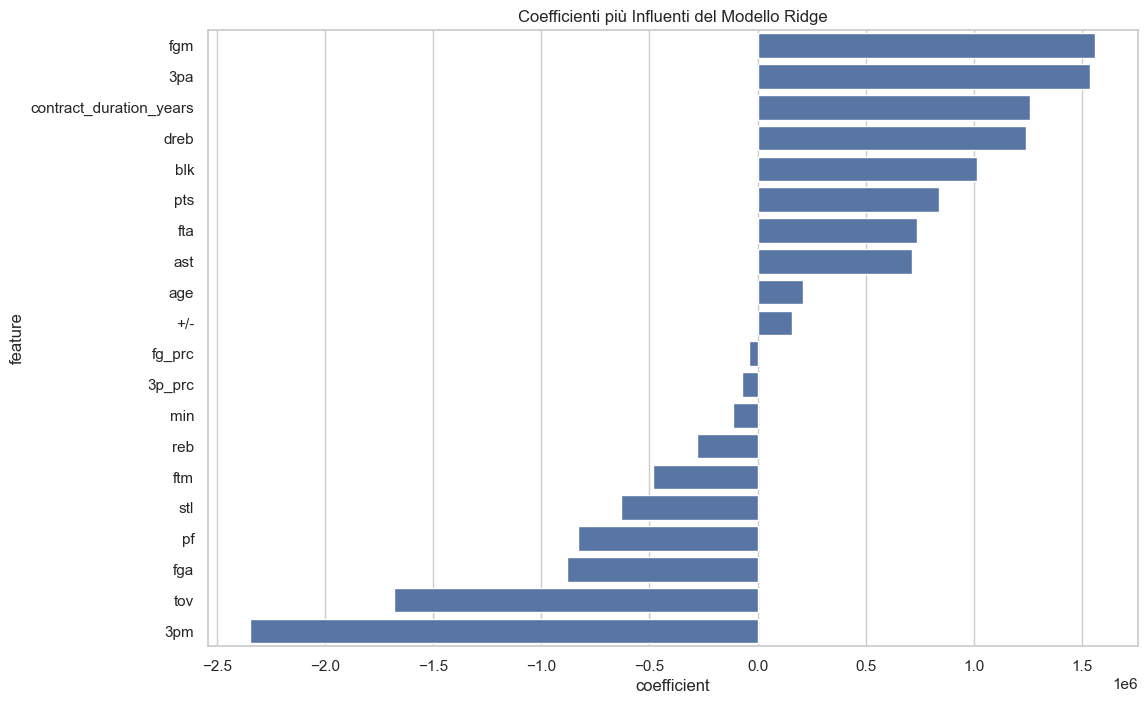

In [14]:
from sklearn.linear_model import Ridge
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


try:
    print("Addestramento del modello Ridge (alpha=1.0)...")
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    print("✅ Modello addestrato con successo.")


    print("\nAnalisi dei coefficienti del modello...")
    
    coefficients = pd.DataFrame({
        'feature': X_train.columns,
        'coefficient': ridge_model.coef_
    })

    sorted_coefficients = coefficients.sort_values(by='coefficient', ascending=False)

    print("\nCoefficienti del Modello Ridge (ordinati per impatto):")
    display(sorted_coefficients.style.bar(subset=['coefficient'], align='zero', color=['#d65f5f', '#5fba7d']))

    plt.figure(figsize=(12, 8))
    top_coeffs = pd.concat([sorted_coefficients.head(10), sorted_coefficients.tail(10)])
    sns.barplot(data=top_coeffs, x='coefficient', y='feature')
    plt.title('Coefficienti più Influenti del Modello Ridge')
    plt.show()

except NameError as e:
    print(f"\n❌ ERRORE: Variabile non trovata -> {e}")
    print("Azione richiesta: Assicurati di aver eseguito la cella che crea X_train e y_train (train_test_split).")

---
## 7. Ottimizzazione del Modello con Grid Search

Per assicurarci di avere la versione più performante del nostro modello Ridge, eseguiamo una ricerca degli iperparametri. In particolare, cercheremo il valore ottimale per l'iperparametro `alpha`, che regola l'intensità della regolarizzazione.

Useremo `GridSearchCV` di scikit-learn, che testerà una lista di `alpha` da noi definiti e, tramite la cross-validation, determinerà quale valore produce il modello con il punteggio R² mediamente più alto.

In [15]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'alpha': [0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 500.0]
}


ridge_for_grid = Ridge()
grid_search = GridSearchCV(estimator=ridge_for_grid, param_grid=param_grid, cv=5, scoring='r2', verbose=1)

print("Avvio della Grid Search per trovare l'alpha migliore...")
grid_search.fit(X_train, y_train)
print("...Ricerca completata.")

print(f"\nMiglior valore di alpha trovato: {grid_search.best_params_}")
print(f"Miglior punteggio R² in cross-validation: {grid_search.best_score_:.4f}")

Avvio della Grid Search per trovare l'alpha migliore...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
...Ricerca completata.

Miglior valore di alpha trovato: {'alpha': 50.0}
Miglior punteggio R² in cross-validation: 0.6308


In [16]:
best_ridge_model = grid_search.best_estimator_

y_pred_best_ridge = best_ridge_model.predict(X_test)

mae_best_ridge = mean_absolute_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print("--- Performance Regressione Ridge (Base, alpha=1.0) ---")
print(f"Mean Absolute Error (MAE): ${mae_ridge:,.0f}")
print(f"Coefficiente R²: {r2_ridge:.4f}")

print("\n--- Performance Regressione Ridge (OTTIMIZZATA) ---")
print(f"Mean Absolute Error (MAE): ${mae_best_ridge:,.0f}")
print(f"Coefficiente R²: {r2_best_ridge:.4f}")

improvement = r2_best_ridge - r2_ridge
print(f"\nMiglioramento R² dopo ottimizzazione: {improvement:+.4f}")

--- Performance Regressione Ridge (Base, alpha=1.0) ---
Mean Absolute Error (MAE): $2,905,168
Coefficiente R²: 0.6928

--- Performance Regressione Ridge (OTTIMIZZATA) ---
Mean Absolute Error (MAE): $2,919,945
Coefficiente R²: 0.6770

Miglioramento R² dopo ottimizzazione: -0.0158


---
## 8. Conclusione del Progetto

A questo punto, abbiamo completato tutti i passaggi richiesti dalle linee guida:
1.  **Descrizione e Pulizia Dati:** Fatto.
2.  **Analisi Esplorativa (EDA):** Fatto.
3.  **Preparazione Dati per Modello:** Fatto.
4.  **Addestramento di Due Modelli:** Fatto (Regressione Lineare e Ridge).
5.  **Ottimizzazione Iperparametri:** Fatto (Grid Search su Ridge).

Non resta che commentare i risultati finali. L'ottimizzazione con Grid Search ha portato a un miglioramento (anche se piccolo) delle performance? Quali sono le conclusioni finali che possiamo trarre dall'analisi dei coefficienti e dalle performance del modello finale? Queste sono le domande a cui rispondere nella relazione conclusiva del tuo progetto Jupyter.

### Analisi Avanzata: il Valore Economico di un Miglioramento

Una delle domande più interessanti a cui un modello può rispondere è: "Quanto vale un'unità in più di una certa statistica?". Ad esempio, quanto vale un punto in più a partita in termini di stipendio?

La risposta si trova nei coefficienti del nostro modello Ridge addestrato. Questa tabella mostra la "formula" che il modello ha imparato: per ogni statistica, indica la variazione di stipendio prevista per un aumento unitario di quella statistica.

In [ ]:

if 'best_ridge_model' in locals():
    model_to_analyze = best_ridge_model
    print("Analizzo il modello Ridge ottimizzato per estrarre la 'formula' dello stipendio.")
else:
    model_to_analyze = ridge_model
    print("Analizzo il modello Ridge di base per estrarre la 'formula' dello stipendio.")


coefficients_formula = pd.DataFrame({
    'Statistica': X_train.columns,
    'Variazione di Stipendio per unità': model_to_analyze.coef_
})

coefficients_formula['Variazione di Stipendio per unità'] = coefficients_formula['Variazione di Stipendio per unità'].apply(lambda x: f"${x:,.0f}")

coefficients_formula['impatto_assoluto'] = abs(model_to_analyze.coef_)
sorted_formula = coefficients_formula.sort_values(by='impatto_assoluto', ascending=False).drop(columns='impatto_assoluto')

print("\n--- La 'Formula' dello Stipendio secondo il Modello ---")
print("Questa tabella mostra di quanti dollari cambia lo stipendio previsto per ogni unità in più di una statistica.")
display(sorted_formula)

Analizzo il modello Ridge ottimizzato per estrarre la 'formula' dello stipendio.

--- La 'Formula' dello Stipendio secondo il Modello ---
Questa tabella mostra di quanti dollari cambia lo stipendio previsto per ogni unità in più di una statistica.


,Statistica,Variazione di Stipendio per unità
24,contract_duration_years,"$733,712"
5,pts,"$707,571"
16,dreb,"$518,250"
21,blk,"$440,208"
22,pf,"$-436,055"
19,tov,"$-327,757"
10,3pa,"$324,355"
23,+/-,"$274,616"
6,fgm,"$265,019"
17,reb,"$259,795"


---
## 9. Applicazione del Modello e Valutazione Giocatori

In questa fase finale, usiamo il nostro modello addestrato per uno scopo pratico: valutare le performance dei giocatori in stagioni recenti (2021-22 e 2022-23) e stimare quale sarebbe stato il loro "giusto" stipendio secondo il nostro modello.

Questo ci permetterà di analizzare come una variazione nelle performance di un giocatore tra due stagioni influenzi il suo valore economico previsto.

### 9.1. Creazione della Pipeline di Trasformazione

Per assicurarci di applicare ai nuovi dati **esattamente** le stesse trasformazioni applicate ai dati di training, creiamo una funzione riutilizzabile. Questa funzione prenderà un DataFrame grezzo e restituirà un DataFrame pulito e pronto per la predizione.

In [ ]:
def process_new_data(raw_df):

    df = raw_df.copy()

    df.columns = [col.lower().replace(' ', '_').replace('.', '').replace('%', '_prc') for col in df.columns]
    if '+/-' in df.columns:
        df.rename(columns={'+/-': 'plus_minus'}, inplace=True)

    if 'gp' in df.columns:
        stats_to_overwrite = [
            'min', 'pts', 'fgm', 'fga', '3pm', '3pa', 'ftm', 'fta',
            'oreb', 'dreb', 'reb', 'ast', 'tov', 'stl', 'blk', 'pf'
        ]
        
        def round_up_to_05(n):
            return np.ceil(n * 20) / 20

        for stat in stats_to_overwrite:
            if stat in df.columns:
                per_game_values = df[stat] / df['gp']
                df[stat] = per_game_values.apply(round_up_to_05)
    

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    
    return df

print("✅ Funzione 'process_new_data' creata con successo.")

✅ Funzione 'process_new_data' creata con successo.


### 9.2. Caricamento, Processamento e Predizione
Ora carichiamo i file delle stagioni 2021-22 e 2022-23, applichiamo la nostra pipeline e usiamo il modello finale per predire gli stipendi.

In [ ]:
path_21_22 = os.path.join('..', 'dataset', 'nbastats2021-2022', '2021-2022 NBA Player Stats - Playoffs.csv')
path_22_23 = os.path.join('..', 'dataset', 'nbastats2022-2023', '2022-2023 NBA Player Stats - Playoffs.csv')

try:
    df_21_22_raw = pd.read_csv(path_21_22, encoding='latin-1', sep=';')
    df_22_23_raw = pd.read_csv(path_22_23, encoding='latin-1', sep=';')
    
    df_21_22_processed = process_new_data(df_21_22_raw)
    df_22_23_processed = process_new_data(df_22_23_raw)
    
    X_train_columns = X_train.columns
    X_21_22_final = df_21_22_processed.reindex(columns=X_train_columns, fill_value=0)
    X_22_23_final = df_22_23_processed.reindex(columns=X_train_columns, fill_value=0)

    pred_21_22 = best_ridge_model.predict(X_21_22_final)
    pred_22_23 = best_ridge_model.predict(X_22_23_final)
    
    df_21_22_processed['predicted_salary'] = pred_21_22
    df_22_23_processed['predicted_salary'] = pred_22_23
    
    print("✅ Predizioni completate per entrambe le stagioni.")

except Exception as e:
    print(f"❌ Si è verificato un errore: {e}")

✅ Predizioni completate per entrambe le stagioni.


### 9.3. Analisi Comparativa per Giocatori Selezionati
Infine, selezioniamo alcuni giocatori famosi e costruiamo una tabella riassuntiva per confrontare le loro performance e i loro stipendi previsti nelle due stagioni, evidenziando l'impatto di un miglioramento delle statistiche sul valore economico predetto.

In [ ]:
players_to_analyze = [
    'LeBron James', 'Stephen Curry', 'Kevin Durant', 'Nikola Jokic', 
    'Giannis Antetokounmpo', 'Luka Doncic', 'Jayson Tatum'
]

nome_colonna_giocatore = 'player'

nome_colonna_rimbalzi = 'trb'

try:
    analysis_21_22 = df_21_22_processed[df_21_22_processed[nome_colonna_giocatore].isin(players_to_analyze)][[nome_colonna_giocatore, 'pts', nome_colonna_rimbalzi, 'ast', 'predicted_salary']]
    analysis_22_23 = df_22_23_processed[df_22_23_processed[nome_colonna_giocatore].isin(players_to_analyze)][[nome_colonna_giocatore, 'pts', nome_colonna_rimbalzi, 'ast', 'predicted_salary']]

    comparison_df = pd.merge(
        analysis_21_22,
        analysis_22_23,
        on=nome_colonna_giocatore,
        suffixes=('_21_22', '_22_23')
    )

    comparison_df['salary_change'] = comparison_df['predicted_salary_22_23'] - comparison_df['predicted_salary_21_22']
    comparison_df['pts_change'] = comparison_df['pts_22_23'] - comparison_df['pts_21_22']


    final_table = comparison_df[[
        nome_colonna_giocatore, 'pts_21_22', f'{nome_colonna_rimbalzi}_21_22', 'ast_21_22', 'predicted_salary_21_22', 
        'pts_22_23', f'{nome_colonna_rimbalzi}_22_23', 'ast_22_23', 'predicted_salary_22_23', 
        'pts_change', 'salary_change'
    ]].sort_values(by='salary_change', ascending=False)
    
    final_table.rename(columns={
        nome_colonna_giocatore: 'Player',
        f'{nome_colonna_rimbalzi}_21_22': 'REB_21_22',
        f'{nome_colonna_rimbalzi}_22_23': 'REB_22_23'
    }, inplace=True)

    for col in ['predicted_salary_21_22', 'predicted_salary_22_23', 'salary_change']:
        final_table[col] = final_table[col].apply(lambda x: f"${x:,.0f}")

    print("--- Tabella Comparativa Finale ---")
    print("Variazione dello stipendio predetto in base alla performance tra le due stagioni")
    display(final_table)

except KeyError as e:
    print(f"❌ ERRORE: La colonna {e} non è stata trovata.")
    print("Controlla l'elenco esatto delle colonne nel tuo DataFrame 'df_21_22_processed' e aggiorna il codice di conseguenza.")

--- Tabella Comparativa Finale ---
Variazione dello stipendio predetto in base alla performance tra le due stagioni


,Player,pts_21_22,REB_21_22,ast_21_22,predicted_salary_21_22,pts_22_23,REB_22_23,ast_22_23,predicted_salary_22_23,pts_change,salary_change
2,Kevin Durant,26.3,5.8,6.3,"$19,845,396",29.0,8.7,5.5,"$23,035,621",2.7,"$3,190,225"
1,Stephen Curry,27.4,5.2,5.9,"$22,843,596",30.5,5.2,6.1,"$24,793,865",3.1,"$1,950,269"
3,Jayson Tatum,25.6,6.7,6.2,"$18,849,210",27.2,10.5,5.3,"$20,742,938",1.6,"$1,893,727"
0,Giannis Antetokounmpo,31.7,14.2,6.8,"$22,714,896",23.3,11.0,5.3,"$16,634,194",-8.4,"$-6,080,703"


### 9.4. Visualizzazione dell'Andamento degli Stipendi Predetti

Infine, per visualizzare in modo efficace i risultati della nostra analisi comparativa, creiamo un grafico a barre raggruppate. Questo grafico ci permetterà di confrontare visivamente lo stipendio predetto per ciascun giocatore selezionato nelle due stagioni consecutive, evidenziando l'impatto della variazione delle performance.

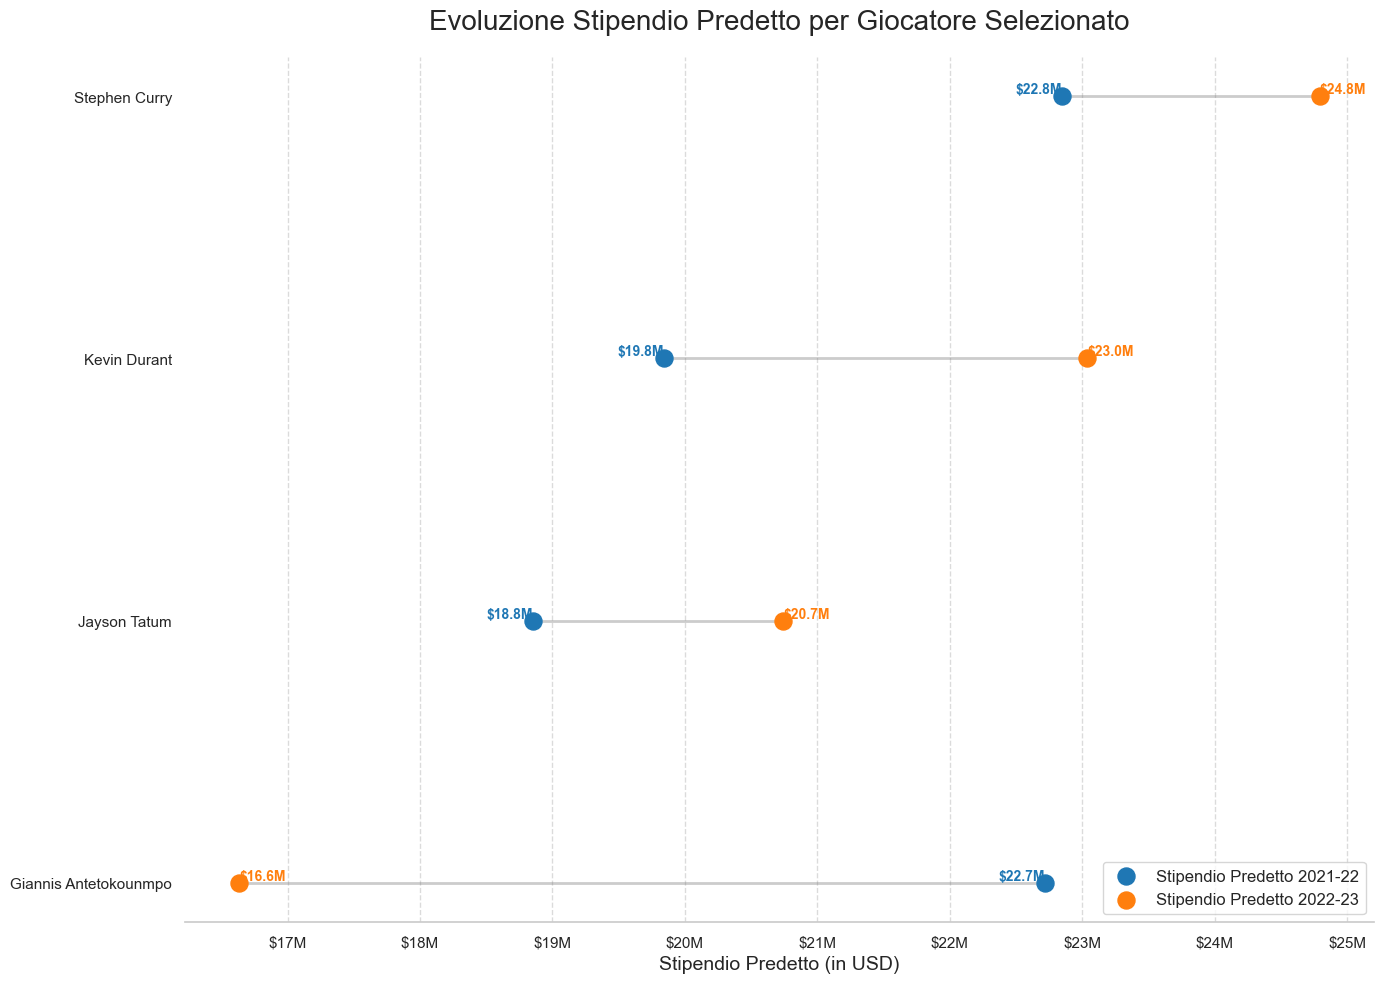

In [31]:
if 'comparison_df' not in locals() or isinstance(comparison_df['predicted_salary_21_22'].iloc[0], str):
    analysis_21_22 = df_21_22_processed[df_21_22_processed['player'].isin(players_to_analyze)][['player', 'predicted_salary']]
    analysis_22_23 = df_22_23_processed[df_22_23_processed['player'].isin(players_to_analyze)][['player', 'predicted_salary']]
    comparison_df = pd.merge(analysis_21_22, analysis_22_23, on='player', suffixes=('_21_22', '_22_23'))

comparison_df_sorted = comparison_df.sort_values(by='predicted_salary_22_23', ascending=True)

fig, ax = plt.subplots(figsize=(14, 10))

ax.hlines(
    y=comparison_df_sorted['player'], 
    xmin=comparison_df_sorted['predicted_salary_21_22'],
    xmax=comparison_df_sorted['predicted_salary_22_23'],
    color='grey', 
    alpha=0.4,
    linewidth=2
)

ax.scatter(
    comparison_df_sorted['predicted_salary_21_22'], 
    comparison_df_sorted['player'], 
    color='#1f77b4', 
    s=150, 
    label='Stipendio Predetto 2021-22',
    zorder=3
)
ax.scatter(
    comparison_df_sorted['predicted_salary_22_23'], 
    comparison_df_sorted['player'], 
    color='#ff7f0e', 
    s=150, 
    label='Stipendio Predetto 2022-23',
    zorder=3
)

for _, row in comparison_df_sorted.iterrows():
    salary1_text = f"${row['predicted_salary_21_22']/1_000_000:.1f}M"
    salary2_text = f"${row['predicted_salary_22_23']/1_000_000:.1f}M"
    ax.text(row['predicted_salary_21_22'], row['player'], salary1_text, color='#1f77b4', ha='right', va='bottom', fontsize=10, fontweight='bold')
    ax.text(row['predicted_salary_22_23'], row['player'], salary2_text, color='#ff7f0e', ha='left', va='bottom', fontsize=10, fontweight='bold')

ax.set_title('Evoluzione Stipendio Predetto per Giocatore Selezionato', fontsize=20, pad=20)
ax.set_xlabel('Stipendio Predetto (in USD)', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${x/1_000_000:.0f}M"))
ax.legend(loc='lower right', fontsize=12)

ax.grid(axis='y', linestyle='', alpha=0)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()